In [ ]:
pip install pyspellchecker;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords 
import re,string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import emoji
import pandas as pd
from googletrans import Translator
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from nltk.corpus import wordnet
from sklearn.metrics import classification_report

#google translate
translator = Translator(service_urls =['translate.google.com'])

#pyspellchecker
spell = SpellChecker()


In [ ]:
#label 0 means negative and 4 means positive
data = pd.read_csv("test_data.csv",encoding = "latin") 
# data = pd.read_csv("test_data.csv",skip_blank_lines=True,encoding = "latin") removed for positive 

data

,ï»¿Label,number,date,no_query,name,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
39996,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
39997,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
39998,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
39999,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
l=[]
for i in data["ï»¿Label"]:
    if(i==0):
        l.append("negative")
    else:
        l.append("positive")
data['label']=l

In [ ]:
#dropping unwanted columns
data=data.drop(columns=['number', 'date','name','no_query','ï»¿Label'])

In [ ]:
data

,Tweet,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive
39997,Mid-morning snack time... A bowl of cheese noo...,positive
39998,@ShaDeLa same here say it like from the Termi...,positive
39999,@DestinyHope92 im great thaanks wbuu?,positive


In [ ]:
#removes all emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [ ]:
def contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "ily":"I love you",
        "Ily":"I love you",
        "Ihy":"I hate you",
        "ihy":"I hate you",
        "imy":"I miss you",
        "Imy":"I miss you",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "im":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "shit":"bad",
        "tmr":"tomorrow",
        "tmrw":"tomorrow",
        "u":"you",
        "ur":"your",
        "k":"okay",
        "ok":"okay",
        "da":"the",
        "tom":"tomorrow",
        "Tom":"tomorrow",
        "v'll":"we will",
        "wassup":"what is up with you",
        "waddup":"what is up with you",
        "yo":"greet",
        "hey":"greet",
        "lol":"laugh",
        "lmao":"laugh",
        "Lmao":"laugh",
        "rofl":"laugh",
        "y":"why",
        "wut":"what",
        "wat":"what",
        "stfu":"angry",
        "wtf":"angry",
        "ya":"yes",
        "yeah":"yes",
        "ummmm":"confused",
        "ummm":"confused",
        "umm":"confused",
        "hmmm":"confused",
        "i'm":"I am",
        "awww":"amazement",
        "Awww":"amazement",
        "aww":"amazement",
        "Aww":"amazement",
        "can't":"cannot",
        "Can't":"cannot",
        "CAN'T":"cannot",
        "awe":"amazement",
        "Awe":"amazement",
        "ugh":"sad",
        "ughh":"sad",
        "Ugh":"sad",
        "Ughh":"sad",
        "UGHH":"sad",
        "ughhhh":"sad",
        "ughhh":"sad"
        }



In [ ]:
def emoticons():
    
    return {
        ":)":"smiley",
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":((((":"sad",
        ":(((":"sad",
        ":((":"sad",
        ":(":"sad",
        ":/":"sad",
        ":///":"sad",
        ":////":"sad",
        "://///":"sad",
        "://":"sad",
        ":///////":"sad",
        ":////":"sad",
        "-_-":"angry",
        ":|":"normal",
        ";)":"playful",
        ";D":"playful",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }




In [ ]:
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    d=contractions()
    emoji=emoticons()
    
    for word in list_sent:
        #removal of url
        word = re.sub(r"http\S+", "", word)
        word = re.sub(r"[www.][a-zA-Z0-9_]+[.com]", "", word)
        #removal of account handles '@'
        word = re.sub("(@[A-Za-z0-9_]+)","", word) 

        word= re.sub("[^a-zA-Z]"," ",word)
        
        #replacing emoticons with their respective words
        if(word in emoji.keys()):
            word=emoji[word]
        #replacing short form words with their full form
        if(word.lower() in d.keys()):
            word=d[word.lower()]
        if(c==0):
            temp_st=word
        else:
            temp_st=temp_st+" "+word
        c=c+1

    
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    
    
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            word=spell.correction(word.lower())
            if word != None:
              word=re.sub("[0-9]+","",word)
              word=re.sub("[.]+"," ",word)
              word=re.sub("[-]+"," ",word)
              word=re.sub("[_]+"," ",word)
              word = re.sub("~"," ", word) 
              if isinstance(word, str):
                if(len(word)!=1):
                    clean_sent.append(word.lower())

    print(clean_sent)
    cleaned_st=""

    # print(sent)

    for i in clean_sent:
        cleaned_st=cleaned_st+" "+i
    #print(cleaned_st)
    
    return lemmatization(cleaned_st)




In [ ]:
def lemmatization(sent):
    lemmatize=WordNetLemmatizer()
    sentence_after_lemmatization=[]
    for word,tag in pos_tag(word_tokenize(sent)):
        if(tag[0:2]=="NN"):
            pos='n'
        elif(tag[0:2]=="VB"):
            pos='v'
        else:
            pos='a'
        lem=lemmatize.lemmatize(word,pos)
        sentence_after_lemmatization.append(lem)
    st=""
    
    for i in sentence_after_lemmatization:
        if(i!="be" and i!="is" and len(i)!=1):
            st=st+" "+i
    #print("lemi",st)
    c=0
    list_text=st.split()
    flag=0
    new_st=""
    for i in list_text:
        temp=i
        if(flag==1):
            flag=0
            continue
        if(i=="not" and (c+1)<len(list_text)):
            for syn in wordnet.synsets(list_text[c+1]):
                antonyms=[]
                for l in syn.lemmas():
                    #print(l)
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                        #print(antonyms)
                        temp=antonyms[0]
                        flag=1
                        break
                if(flag==1):
                    break
        new_st=new_st+" "+temp
        c+=1
    # print(new_st)
    return new_st



In [ ]:
#nltk module to get the sentiment polarity
def sentiment_analysis(sent):
        sid = SentimentIntensityAnalyzer()
        #print("-------------------------------------")
        print(sent)
        #print("-------------------------------------")
        ss = sid.polarity_scores(sent)
        x=ss['pos']
        y=ss['neg']
        print(x-y)
        print("-------------------------------------")
        return x-y



In [ ]:
def start(text):
    text =BeautifulSoup(text).get_text()
    text =text.replace("’","'")
    new_text=sent_tokenize(text)
    result=0
    new_str=""
    for i in new_text:
        j=deEmojify(i)
        res=removal_of_noise(j)
        new_str=new_str+" "+res
    # print(new_str)
    return new_str


In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
nltk.download('stopwords')
clean_list=[]
for i in data["Tweet"]:
    print()
    print(i)
    # if "@smarrison" not in i:
    if isinstance(i, str):
      if i != None:
        x=start(i)
        clean_list.append(x)
        print()
        print(x)
        print("-------------------------")
    else:
      clean_list.append("")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.

  love
-------------------------

shares http://tr.im/mLRR more info about Yahoo's Purple Project.  http://plurk.com/p/wyrws
shares http://tr.im/mLRR more info about Yahoo's Purple Project.  http://plurk.com/p/wyrws
['shares', 'info', 'yahoo', 'purple', 'project']
[]

  share info yahoo purple project 
-------------------------

@ArvindRocks lol... amazing - isnt it? Weekend plan chalked out? Incoming cash - cant get better 
@ArvindRocks lol... amazing - isnt it? Weekend plan chalked out? Incoming cash - cant get better 
['lol', 'amazing', "isn't"]
['weekend', 'plan', 'chalked']
['incoming', 'cash', 'cant', 'get', 'better']

  lol amazing n't  weekend plan chalk  incoming cash cant get good
-------------------------

@divinefusion I'll talk about the idea once I've made it work, lol. Don't wanna talk about something I haven't got to work yet 
@divinefusion I'll talk about the idea once I've made it work, lol. Don't wanna talk about so

In [ ]:
with open('cleaned_tweet.txt', 'w') as f:
    for item in clean_list:
        f.write("%s\n" % item)       

In [ ]:
#reading from file cleaned tweets and storing in a cleaned tweets column in the dataframe
filename = "cleaned_tweet.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
data["cleaned_tweets"]=lines

In [ ]:
#reading the adjective file
filename = "english-adjectives.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
adjectives=lines

In [ ]:
#All adjectives words in the file
all_words=[]
negative=["not"]
for i in data["cleaned_tweets"]:
    for word in word_tokenize(i):
        if(word in adjectives or word in negative):
        # if(word in adjectives ):
            all_words.append(word)

len(all_words)

44548

In [ ]:
#creating a frequency distribution of each adjectives. 
import nltk
BagOfWords = nltk.FreqDist(all_words)
BagOfWords
len(BagOfWords)

964

In [ ]:
# listing the  5000 most frequent words
word_features = list(BagOfWords.keys())[:5000]
len(word_features)
#word_features

964

In [ ]:
#after preprocessing data
data


,Tweet,label,cleaned_tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,aww bummer shoulda get david carr third day
1,is upset that he can't update his Facebook by ...,negative,upset update facebook texting might cry resu...
2,@Kenichan I dived many times for the ball. Man...,negative,dive many time ball manage save rest go bound
3,my whole body feels itchy and like its on fire,negative,le body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",negative,misbehave mad see
...,...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive,grandma make dinner mum
39997,Mid-morning snack time... A bowl of cheese noo...,positive,mid morning snack time bowl cheese noodle yum
39998,@ShaDeLa same here say it like from the Termi...,positive,say like terminator movie come like
39999,@DestinyHope92 im great thaanks wbuu?,positive,great thanks but


In [ ]:
#assigning feature for each row in clean_tweets 
new_list=[]
for i in data["cleaned_tweets"]:
    st=""
    for j in i.split():
        if(j in word_features):
            st=st+" "+j
    new_list.append(st)
    
data["cleaned_tweets"]=new_list

In [ ]:
data

,Tweet,label,cleaned_tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,third
1,is upset that he can't update his Facebook by ...,negative,upset
2,@Kenichan I dived many times for the ball. Man...,negative,
3,my whole body feels itchy and like its on fire,negative,itchy
4,"@nationwideclass no, it's not behaving at all....",negative,mad
...,...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive,
39997,Mid-morning snack time... A bowl of cheese noo...,positive,
39998,@ShaDeLa same here say it like from the Termi...,positive,
39999,@DestinyHope92 im great thaanks wbuu?,positive,great


In [ ]:
#Spliting into test data and train data
y=data["label"]
x=data.drop('label',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [ ]:
x_train.shape

(34000, 2)

In [ ]:
#creating test and train data frames
X_train = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
X_test = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
Y_train = []
Y_test = []
X_train = X_train.append(x_train)
for i in y_test:
    Y_test.append(i)
for i in y_train:
     Y_train.append(i)
X_test = X_test.append(x_test)

In [ ]:
#spliting into train sets for training 
training_set=[]
count=0
for i in (X_train["cleaned_tweets"]):
    training_set.append((i.split(),Y_train[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]
training_set_formatted

[({}, 'positive'),
 ({}, 'negative'),
 ({'bad': True, 'old': True, 'stupid': True}, 'negative'),
 ({'good': True, 'far': True, 'spicy': True, 'real': True, 'soon': True},
  'positive'),
 ({'good': True, 'almost': True}, 'negative'),
 ({'old': True}, 'negative'),
 ({'bad': True, 'never': True, 'back': True}, 'negative'),
 ({}, 'negative'),
 ({}, 'negative'),
 ({'great': True, 'sad': True}, 'negative'),
 ({}, 'positive'),
 ({'always': True, 'unhappy': True, 'small': True}, 'positive'),
 ({'happy': True}, 'positive'),
 ({'not': True}, 'negative'),
 ({'idea': True}, 'negative'),
 ({'short': True}, 'negative'),
 ({}, 'positive'),
 ({'cool': True}, 'positive'),
 ({}, 'positive'),
 ({}, 'positive'),
 ({}, 'positive'),
 ({'good': True}, 'negative'),
 ({}, 'positive'),
 ({'back': True}, 'negative'),
 ({'sick': True, 'even': True}, 'negative'),
 ({'nice': True, 'hot': True}, 'negative'),
 ({'good': True, 'grave': True}, 'positive'),
 ({'last': True}, 'negative'),
 ({'fine': True}, 'positive'),
 

In [ ]:
#spliting into test sets for testing
test_set=[]
count=0
for i in (X_test["cleaned_tweets"]):
    test_set.append((i.split(),Y_test[count]))
    count+=1    

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])
 

test_set_formatted= [(list_to_dict(element[0]), element[1]) for element in test_set]

In [ ]:
from sklearn.metrics import recall_score,precision_score
#making a list of classifiers with their names
classifiers=[]
#making a list of classifiers with their accuracy
accuracy=[]

In [ ]:
#naive bayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set_formatted)

ground_truth = [r[1] for r in test_set_formatted]
preds = [classifier.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

#accuracy
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, test_set_formatted))*100)
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)
print()

classifier.show_most_informative_features(15)

classifiers.append([classifier,"naive bayes classifier"])

accuracy.append([(nltk.classify.accuracy(classifier, test_set_formatted))*100,"NB"])

print("Original Naive Bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Original Naive Bayes Algo accuracy percent: 61.93967672054658

Most Informative Features
                 unhappy = True           negati : positi =     17.0 : 1.0
                 awesome = True           positi : negati =     17.0 : 1.0
                     sad = True           negati : positi =     15.3 : 1.0
                  lonely = True           negati : positi =     14.8 : 1.0
                  female = True           negati : positi =     14.6 : 1.0
                   proud = True           positi : negati =     14.1 : 1.0
           unfortunately = True           negati : positi =     14.1 : 1.0
                    poor = True           negati : positi =     11.9 : 1.0
                terrible = True           negati : positi =     11.9 : 1.0
                    loss = True           negati : positi =     11.8 : 1.0
                  broken = True           negati : positi =     10.7 : 1.0
                    sick = True           negati : positi =     10.5 : 1.0
           

In [ ]:
#Logistic regression
LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set_formatted)
print("Logistic Regression classifier accuracy percent:", (nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [LogReg_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100,"LogReg"])


classifiers.append([LogReg_clf,"Bernouli LogisticRegression_classifier"])

print("Logistic regression\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression classifier accuracy percent: 62.206298950174975
Logistic regression

              precision    recall  f1-score   support

    positive       0.70      0.43      0.53      3011
    negative       0.59      0.82      0.68      2990

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



In [ ]:
#Support vector classifier 
SVC_clf = SklearnClassifier(SVC())
SVC_clf.train(training_set_formatted)
print("Support vector classifier accuracy percent:", (nltk.classify.accuracy(SVC_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SVC_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"SVC"])

classifiers.append([SVC_clf,"SVC classifier"])

print("Support vector classifier\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Support vector classifier accuracy percent: 61.77303782702883
Support vector classifier

              precision    recall  f1-score   support

    positive       0.69      0.43      0.53      3011
    negative       0.58      0.81      0.68      2990

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.60      6001
weighted avg       0.64      0.62      0.60      6001



In [ ]:
from nltk.classify import ClassifierI
from statistics import mode 

# Defininig the ensemble model class 

class EnsembleClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    # returns the classification based on majority of votes
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
  

In [ ]:
# Initializing the ensemble classifier 
def hybrid(test_set_formatted):
    ensemble_clf = EnsembleClassifier(classifiers[0][0], classifiers[1][0], classifiers[2][0])

    # List of only feature dictionary from the featureset list of tuples 
    feature_list = [f[0] for f in test_set_formatted]
    global c
    # Looping over each to classify each review
    ensemble_preds = [ensemble_clf.classify(features) for features in feature_list]
    for i in range(len(ensemble_preds)):
        if(ensemble_preds[i]==Y_test[i]):
            c+=1
    return ensemble_preds
c=0
preds=hybrid(test_set_formatted)
ground_truth = [r[1] for r in test_set_formatted]


f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')
print("Accuracy of hybrid : ",100*c/len(preds))
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([100*c/len(preds),"Hybrid"])

print("Hybrid\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Accuracy of hybrid :  61.93967672054657
Hybrid

              precision    recall  f1-score   support

    positive       0.69      0.44      0.53      3011
    negative       0.59      0.81      0.68      2990

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



In [ ]:
accuracy

[[61.93967672054658, 'NB'],
 [61.93967672054658, 'NB'],
 [62.206298950174975, 'LogReg'],
 [61.77303782702883, 'SVC'],
 [61.93967672054657, 'Hybrid']]

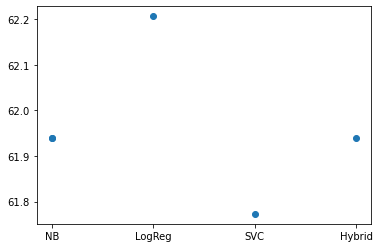

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np
  
# x-axis values 
x=[]
for i in accuracy:
    x.append(i[0])

# Y-axis values 
y = []
for i in accuracy:
    y.append(i[1])

# Function to plot 
plt.scatter(y,x,) 

  
# function to show the plot 
plt.show() 

In [ ]:
def features(text):
    new_list=[]
    for i in text.split():
        if(i in adjectives):
            new_list.append(i)
    return new_list

In [ ]:
def text_classify(text):
    cleaned_text=start(text)
    temp=features(cleaned_text)
    test_data=list_to_dict(temp)
    print(temp)
    print("Input given by user : ",text)
    for i in classifiers:
        print(i[1])
        determined_label=i[0].classify(test_data)
        print("This Input is ",determined_label)
        print("------------------------------")
    c=0
    print("Hybrid model")
    testset_data=[]
    testset_data.append([test_data,""])
    lab=hybrid(testset_data)
    # print("This Tweet is ",lab[0])//for some good reason its changed  REMEMBER IT WAS EARLIER LINE BELOW IT IS ADDED.
    print(lab)
    return lab[0]

In [ ]:
print(text_classify("I kill You"))

['kill']
[]
Input given by user :  I kill You
naive bayes classifier
This Input is  positive
------------------------------
naive bayes classifier
This Input is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Input is  positive
------------------------------
SVC classifier
This Input is  positive
------------------------------
Hybrid model
['positive']
positive


In [ ]:
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
 
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
x=negative_tweets[:1000]
st=""
for i in x:
    st=st+" "+i
st

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


' hopeless for tmr :( Everything in the kids section of IKEA is so cute. Shame I\'m nearly 19 in 2 months :( @Hegelbon That heart sliding into the waste basket. :( “@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too Dang starting next week I have "work" :( oh god, my babies\' faces :( https://t.co/9fcwGvaki0 @RileyMcDonough make me smile :(( @f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2" Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz I have a really good m&amp;g idea but I\'m never going to meet them :((( @Rampageinthebox mare ivan :( @SophiaMascardo happy trip, keep safe. see you soon :* :( I\'m so tired hahahah :( @GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch. relate to the "sweet n\' sour" kind of "bi-polar

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
text_classify(st)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['hopeless', 'tomorrow', 'everything', 'kids', 'section', 'ikea', 'cute']
['shame', 'nearly', 'months', 'heart', 'sliding', 'waste', 'basket']
['hate', 'japanese', 'call', 'bani', 'dang', 'starting', 'next', 'week', 'work', 'oh', 'god', 'babies', 'faces', 'make', 'smile', 'work', 'neighbour', 'motors']
['asked', 'said', 'hates', 'updates', 'search']
['salad', 'glacier', 'glacier', 'jasper', 'albert', 'really', 'good', 'idea', 'never', 'going', 'meet', 'mare', 'ivan', 'happy', 'trip', 'keep', 'safe']
['see', 'soon', 'tired', 'hahaha', 'knee', 'replacements', 'get', 'day']
['ouch']
['relate', 'sweet', 'sour', 'kind', 'bi', 'polar', 'people', 'life', 'cuz', 'life', 'full', 'please', 'not', 'sure', 'tho', 'feel', 'stupid', 'seem', 'grasp', 'basics', 'digital', 'painting', 'nothing', 'researching', 'helping', 'good', 'lord']
['feel', 'lonely', 'someone', 'talk', 'guys', 'girls', 'assignment', 'project']
['really']
['want', 'play', 'video', 'games', 'movies', 'someone', 'choreographing', 'ha

'negative'

In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 1.4 MB 16.3 MB/s 
     |████████████████████████████████| 42 kB 984 kB/s 
     |████████████████████████████████| 65 kB 969 kB/s 
     |████████████████████████████████| 53 kB 1.3 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=b2e52e86e371a1335a9ee5f1f24efd26b230f3ecef4979c63e7819c715f0d895
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
import pandas as pd
import googletrans
from googletrans import Translator
translator = Translator()

def detectLanguage(s):
  my= translator.detect(s)
  return my.lang

In [ ]:
print(detectLanguage("ମୁଁ ଭାରତକୁ ଭଲ ପାଏ |"))

or


In [ ]:
#input from the user which will be used to classify 
import googletrans
from textblob import TextBlob

def detectSentiment(input_text):
    translator = googletrans.Translator()
    source=detectLanguage(input_text)
    # english=en
    # translator = Translator(to_lang="en",from_lang=source)
    translated_text = translator.translate(input_text,src=source, dest='en').text
            
    return text_classify(translated_text)

In [ ]:
print(detectSentiment("I want to kill You"))

['want', 'kill']
[]
Input given by user :  I want to kill You
naive bayes classifier
This Input is  positive
------------------------------
naive bayes classifier
This Input is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Input is  positive
------------------------------
SVC classifier
This Input is  positive
------------------------------
Hybrid model
positive


In [ ]:
#input from the user which will be used to classify 
from textblob import TextBlob

def hinglish2(input_text):
    # l=input_text.split()
    # translator = Translator(to_lang="en",from_lang="hi")
    translated_text = translator.translate(input_text,src='hi', dest='en').text
            
    text_classify(translated_text)

In [ ]:
print(hinglish2("arrey waah! I'm very proud of you"))

['array', 'wah']
['proud']
['proud']
Input given by user :  arrey wah! I'm very proud of you
naive bayes classifier
This Input is  positive
------------------------------
naive bayes classifier
This Input is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Input is  positive
------------------------------
SVC classifier
This Input is  positive
------------------------------
Hybrid model
None


In [ ]:
pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#for odiya
from translate import Translator

def odiya(text):
  translator = Translator(to_lang="en",from_lang="or")
  translated_text = translator.translate(text)
  text_classify(translated_text)
  print(translated_text)

odiya("ମୁଁ ତୁମକୁ ଭଲପାଏ")

['love']
['love']
Input given by user :  I love you
naive bayes classifier
This Input is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Input is  positive
------------------------------
SVC classifier
This Input is  positive
------------------------------
Hybrid model
This Tweet is  positive
I love you


In [ ]:
def func(input_text):
    # input_text.split()
    flag=0
    hinglish2(input_text)
  
func("arrey waah! I'm very proud of you");           

['array', 'wash']
['proud']
['proud']
Input given by user :  arrey waah! I'm very proud of you
naive bayes classifier
This Input is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Input is  positive
------------------------------
SVC classifier
This Input is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [ ]:
func("tum log pagal ho")

['tum', 'sa']
[]
Input given by user :  Tum sa
naive bayes classifier
This Input is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Input is  negative
------------------------------
SVC classifier
This Input is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("tum pagal ho")

['crazy']
['crazy']
Input given by user :  Are you crazy
naive bayes classifier
This Input is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Input is  positive
------------------------------
SVC classifier
This Input is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [ ]:
func("tum kharab ho")

['tum', 'arab', 'ho']
[]
Input given by user :  tum kharab ho
naive bayes classifier
This Input is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Input is  negative
------------------------------
SVC classifier
This Input is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("you are foolish and horrible")

['foolish', 'horrible']
['foolish', 'horrible']
Input given by user :  you are foolish and horrible
naive bayes classifier
This Input is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Input is  negative
------------------------------
SVC classifier
This Input is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("you are not accha")

['not', 'alpha']
['not']
Input given by user :  you are not accha
naive bayes classifier
This Input is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Input is  positive
------------------------------
SVC classifier
This Input is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [ ]:
func("you are unpleasant")

['unpleasant']
['unpleasant']
Input given by user :  you are unpleasant
naive bayes classifier
This Input is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Input is  negative
------------------------------
SVC classifier
This Input is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.2 MB/s 
     |████████████████████████████████| 272 kB 45.6 MB/s 
     |████████████████████████████████| 2.3 MB 48.7 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 106 kB 57.7 MB/s 
     |████████████████████████████████| 213 kB 54.8 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 856 kB 63.9 MB/s 
     |████████████████████████████████| 4.1 MB 26

In [ ]:
import gradio as gr

def greet(input):
  return detectSentiment(input)



iface=gr.Interface(fn=greet,inputs=gr.Textbox(lines=1, placeholder="Input Here..."),outputs=gr.Textbox())
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15827.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7ffac6d59cd0>,
 'http://127.0.0.1:7860/',
 'https://15827.gradio.app')

In [ ]:
!pip install flask_ngrok

In [ ]:
from flask import *
from flask_ngrok import run_with_ngrok

In [ ]:
app=Flask(__name__)

In [ ]:
@app.route('/')
def hello_world():
  return render_template("index.html")
@app.route('/get-answer',methods=['POST','GET'])
def login():
    if request.method == "POST":
      # showAns = "show_ans"
      text = request.form['text']
      answer2 = detectSentiment(text)
      
      # original2 = data.loc[data["question"] == question]["answer"].values[0], original=original2
      return render_template('index.html', answer=answer2, text1=text, question1=question)
      # return render_template('demo.html', answer=answer2)


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2HibstqWaf4gQh2ZKYDgRSLgxii_6eaCHoAVVYpFucLdoc2m5

In [ ]:
run_with_ngrok(app)
app.run()